In [1]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


    
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        for member in root.findall('object'):
            value = ('images/'+root.find('filename').text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text),
                     member[0].text,
                     )
            xml_list.append(value)
    column_name = ['filename', 'xmin','ymin','xmax', 'ymax', 'class']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [2]:
image_path = os.path.join(os.getcwd(), 'images/')
dataset_df = xml_to_csv(image_path)


print('Completed')

Completed


In [3]:
import skimage.io as io
from keras_retinanet.utils.visualization import draw_box
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

def showObjects(image_df):

    img_path = image_df.filename
    box = [image_df.xmin, image_df.ymin, image_df.xmax, image_df.ymax]

    image = io.imread(img_path)
    draw = image.copy()
    draw_box(draw, box, color=(0, 255, 0))

    plt.axis('off')
    plt.imshow(draw)
    plt.show()

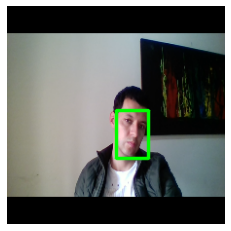

In [4]:
showObjects(dataset_df.iloc[9])

In [5]:
train_df, test_df = train_test_split(
  dataset_df, 
  test_size=0.1, 
  random_state=2
)

In [6]:
train_df=dataset_df
train_df.to_csv('annotations.csv', index=False, header=None)
#test_df.to_csv('annotations_test.csv', index=False, header=None)

classes = set(['0', '1', '2'])

with open('classes.csv', 'w') as f:
    for i, line in enumerate(sorted(classes)):
        f.write('{},{}\n'.format(line,i))